# VISp and VISpm


## Team Member Names & Contributions
*Feel free to name your team, but please also include your real names and IDs here. Please specify who in your group worked on which parts of the project.*

- **Yudi Hu**: 
- **Lauren Hui**: 
- **Sunnie Hong**: 

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

*Fill in your research question here*

# Background and Prior Work

*Fill in your background and prior work here (~500 words). You are welcome to use additional subheadings. You should also include a paragraph describing each dataset and how you'll be using them.* 

### References (include links):
(1)

(2)

## Hypothesis


*Fill in your hypotheses here*

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

Importing packages needed for the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
import xarray as xr

Importing Cell Types Dataset from Allen Brain Institute

In [2]:
cell_type_df = pd.read_csv('cell_types_specimen_details.csv')
cell_type_df

,line_name,specimen__id,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,...,ephys_thumb_path,ephys_inst_thresh_thumb_path,donor__age,donor__sex,donor__disease_state,donor__race,donor__years_of_seizure_history,donor__species,donor__id,donor__name
0,NaN,525011903,H16.03.003.01.14.02,right,12113,"""frontal lobe""",FroL,12113,FroL,3,...,/api/v2/well_known_file_download/529903140,/api/v2/well_known_file_download/529903142,25 yrs,Male,epilepsy,White or Caucasian,9.0,Homo Sapiens,524848408,H16.03.003
1,Oxtr-T2A-Cre,565871768,Oxtr-2A-Cre;Ai14-293837.03.01.02,left,778,"""Primary visual area, layer 5""",VISp5,385,VISp,5,...,/api/v2/well_known_file_download/566738214,/api/v2/well_known_file_download/566738219,NaN,NaN,NaN,NaN,NaN,Mus musculus,563340157,Oxtr-T2A-Cre;Ai14-293837
2,Pvalb-IRES-Cre,469801138,Pvalb-IRES-Cre;Ai14-170927.05.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/487618917,/api/v2/well_known_file_download/491380580,NaN,NaN,NaN,NaN,NaN,Mus musculus,319194354,Pvalb-IRES-Cre;Ai14(IVSCC)-170927
3,NaN,528642047,H16.06.009.01.02.06.05,left,12141,"""middle temporal gyrus""",MTG,12141,MTG,5,...,/api/v2/well_known_file_download/660970973,/api/v2/well_known_file_download/660970975,48 yrs,Female,epilepsy,unknown,33.0,Homo Sapiens,528574320,H16.06.009
4,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,605889373,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,right,821,"""Primary visual area, layer 2/3""",VISp2/3,385,VISp,2/3,...,/api/v2/well_known_file_download/657612184,/api/v2/well_known_file_download/657612186,NaN,NaN,NaN,NaN,NaN,Mus musculus,605622695,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,Ctgf-T2A-dgCre,512322162,Ctgf-2A-dgCre;Ai14(IVSCC)-240529.03.02.01,right,305,"""Primary visual area, layer 6b""",VISp6b,385,VISp,6b,...,/api/v2/well_known_file_download/513878612,/api/v2/well_known_file_download/513878614,NaN,NaN,NaN,NaN,NaN,Mus musculus,511856495,Ctgf-2A-dgCre;Ai14(IVSCC)-240529
2327,Rorb-IRES2-Cre,488473535,Rorb-IRES2-Cre-D;Ai14-212867.03.01.01,left,821,"""Primary visual area, layer 2/3""",VISp2/3,385,VISp,2/3,...,/api/v2/well_known_file_download/488474970,/api/v2/well_known_file_download/491376689,NaN,NaN,NaN,NaN,NaN,Mus musculus,487607572,Rorb-IRES2-Cre-D;Ai14-212867
2328,Rorb-IRES2-Cre,467003163,Rorb-IRES2-Cre-D;Ai14-172652.02.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/487623212,/api/v2/well_known_file_download/491378303,NaN,NaN,NaN,NaN,NaN,Mus musculus,322489498,Rorb-IRES2-Cre-D;Ai14(IVSCC)-172652
2329,Pvalb-IRES-Cre,572609946,Pvalb-IRES-Cre;Ai14-301945.04.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/575795570,/api/v2/well_known_file_download/575795572,NaN,NaN,NaN,NaN,NaN,Mus musculus,570930952,Pvalb-IRES-Cre;Ai14-301945


Importing the Neuropixels Cache. 

In [3]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

## Data Wrangling

From the Cell Types database: creating a separate dataframe for VISp and VISpm data

In [4]:
cell_type_VISp = cell_type_df[cell_type_df['structure_parent__acronym'].str.contains('VISp')].reset_index(drop=True).fillna(0)
cell_type_VISpm = cell_type_df[cell_type_df['structure_parent__acronym'].str.contains('VISpm')].reset_index(drop=True).fillna(0)
print(cell_type_VISp.head())
print(cell_type_VISpm.head())

                          line_name  specimen__id  \
0                      Oxtr-T2A-Cre     565871768   
1                    Pvalb-IRES-Cre     469801138   
2  Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre     605889373   
3                      Cux2-CreERT2     485909730   
4                    Scnn1a-Tg3-Cre     323865917   

                                      specimen__name specimen__hemisphere  \
0                   Oxtr-2A-Cre;Ai14-293837.03.01.02                 left   
1                Pvalb-IRES-Cre;Ai14-170927.05.02.01                right   
2  Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...                right   
3                  Cux2-CreERT2;Ai14-205530.03.02.01                right   
4                Scnn1a-Tg3-Cre;Ai14-172530.06.01.01                 left   

   structure__id                   structure__name structure__acronym  \
0            778    "Primary visual area, layer 5"              VISp5   
1            721    "Primary visual area, layer 4"              VISp4   

From these datasets, making another dataframe specifically including average firing rate, peak to ramp, adaptation index, and time constant from VISp and VISpm data respectively.

In [5]:
visp_features = cell_type_VISp[['ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation', 'structure_parent__acronym']]
vispm_features = cell_type_VISpm[['ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation', 'structure_parent__acronym']]
print(visp_features.head())
print(vispm_features.head())

   ef__avg_firing_rate  ef__peak_t_ramp    ef__tau  ef__adaptation  \
0             0.000000        14.737200  11.291090        0.000000   
1            79.952029        11.763022   4.121689        0.000643   
2            12.666099         8.423400   5.166574       -0.015098   
3            17.890688         2.851312  20.567767        0.032340   
4            10.611937         3.421542  23.182755        0.026732   

  structure_parent__acronym  
0                      VISp  
1                      VISp  
2                      VISp  
3                      VISp  
4                      VISp  
   ef__avg_firing_rate  ef__peak_t_ramp    ef__tau  ef__adaptation  \
0            39.570967         9.657793   7.296395        0.012464   
1            41.345379         8.521987   6.825851        0.010213   
2            21.317416         3.257533  25.230889        0.033795   
3            73.053430        11.424590   6.992904        0.001740   
4            16.740791         3.190572  19.41286

In [6]:
cell_p = cell_type_VISp[['ef__avg_firing_rate']].fillna(0)
cell_p['firing_rate'] = cell_p['ef__avg_firing_rate']
cell_p = cell_p.drop(['ef__avg_firing_rate'],axis=1)
cell_p['ecephys_structure_acronym'] = cell_type_VISp['structure_parent__acronym']
print(cell_p)

      firing_rate ecephys_structure_acronym
0        0.000000                      VISp
1       79.952029                      VISp
2       12.666099                      VISp
3       17.890688                      VISp
4       10.611937                      VISp
...           ...                       ...
1715    13.623050                      VISp
1716    47.867248                      VISp
1717    16.498150                      VISp
1718    81.532817                      VISp
1719    19.641649                      VISp

[1720 rows x 2 columns]


In [7]:
cell_pm = cell_type_VISpm[['ef__avg_firing_rate']].fillna(0)
cell_pm['firing_rate'] = cell_pm['ef__avg_firing_rate']
cell_pm = cell_pm.drop(['ef__avg_firing_rate'],axis=1)
cell_pm['ecephys_structure_acronym'] = cell_type_VISpm['structure_parent__acronym']
print(cell_pm)

    firing_rate ecephys_structure_acronym
0     39.570967                     VISpm
1     41.345379                     VISpm
2     21.317416                     VISpm
3     73.053430                     VISpm
4     16.740791                     VISpm
..          ...                       ...
84    65.288801                     VISpm
85   100.401606                     VISpm
86    31.084528                     VISpm
87    15.202519                     VISpm
88    11.093362                     VISpm

[89 rows x 2 columns]


Creating an EphysProjectCache object for the Neuropixels data and retrieving all sessions.

In [8]:
cache = EcephysProjectCache.fixed(manifest=manifest_path)
sessions = cache.get_session_table()
print('Total number of sessions: ' + str(len(sessions)))
sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


Creating a list of all VISp sessions from the Neuropixels dataset.

In [9]:
session_visp_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'VISp' in structure_list:
        session_visp_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_visp_list))+' sessions that meet this criteria:')
print(session_visp_list)

There are 56 sessions that meet this criteria:
[715093703, 719161530, 721123822, 732592105, 737581020, 739448407, 742951821, 743475441, 744228101, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 758798717, 759883607, 760345702, 760693773, 761418226, 762120172, 762602078, 763673393, 766640955, 767871931, 768515987, 771160300, 771990200, 773418906, 774875821, 778240327, 778998620, 779839471, 781842082, 786091066, 787025148, 789848216, 791319847, 793224716, 794812542, 797828357, 798911424, 799864342, 816200189, 821695405, 829720705, 831882777, 835479236, 839068429, 839557629, 840012044, 847657808]


Creating a list of all VISpm sessions from the Neuropixels dataset.

In [10]:
session_vispm_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'VISpm' in structure_list:
        session_vispm_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_vispm_list))+' sessions that meet this criteria:')
print(session_vispm_list)

There are 36 sessions that meet this criteria:
[715093703, 719161530, 732592105, 737581020, 742951821, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 758798717, 759883607, 760345702, 760693773, 761418226, 767871931, 771160300, 771990200, 778240327, 778998620, 779839471, 786091066, 791319847, 794812542, 797828357, 816200189, 819186360, 821695405, 831882777, 839068429, 839557629, 840012044, 847657808]


Using the first session in the VISp session list, we retrieve all trials that used a flash stimulus.

In [11]:
session = cache.get_session_data(session_visp_list[0])
session.get_stimulus_table(['flashes'])

,color,contrast,orientation,phase,pos,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,
3647,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1274.523973,1,flashes,1274.774189,0.250216,244
3648,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1276.525623,1,flashes,1276.775842,0.250219,244
3649,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1278.527343,1,flashes,1278.777552,0.250209,245
3650,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1280.529013,1,flashes,1280.779222,0.250209,244
3651,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1282.530723,1,flashes,1282.780924,0.250201,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1564.766513,1,flashes,1565.016712,0.250199,245
3793,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1566.768143,1,flashes,1567.018352,0.250209,244
3794,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1568.769833,1,flashes,1569.020042,0.250209,244


VISP

In [12]:
#y containing binned spikes aligned to the start of each stimulus.
import xarray as xr
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISp')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da_visp = optotagging_spike_counts(bin_edges, trials, units)
print(da_visp)

/opt/conda/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1086: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


<xarray.DataArray 'spike_counts' (trial_id: 45, time_relative_to_stimulus_onset: 70, unit_id: 110)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0

In [13]:
#we searched for units in VISp that increase their firing rate during the 10 ms pulse
baseline = da_visp.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate = baseline.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked = da_visp.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate = evoked.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

In [14]:
#select a threshold: 2x increase in firing rate (red line) to find PV+ insterneurons in VISp
cre_pos_units_visp = da_visp.unit_id[(evoked_rate / (baseline_rate + 1)) > 2].values # add 1 to prevent divide-by-zero errors

cre_pos_units_visp

array([950918280, 950918175, 950918344, 950918362, 950918491, 950918570,
       950919054, 950919249, 950919120, 950919496, 950919748, 950930145,
       950930358, 950931423, 950931363, 950933840, 950931727, 950931853])

In [15]:

#create an empty column "cell_type" for visp units 
import pandas as pd
cre_pos_units_visp=list(cre_pos_units_visp)
df_visp_units=session.units[session.units.ecephys_structure_acronym.str.match('VISp')]
df_visp_units_index = df_visp_units.index.values.tolist()
df_visp_units['cell_type']=''
id = df_visp_units.index.values.tolist()


df_visp_units_rows = len(df_visp_units.axes[0])

#assign PV+/PV- to the cell type column 
for i in range(df_visp_units_rows):
    if id[i] in cre_pos_units_visp:
        df_visp_units.at[id [i],'cell_type']='PV+'
    else:
        df_visp_units.at[id [i],'cell_type']='PV-'

df_visp_units

,amplitude_cutoff,max_drift,d_prime,waveform_halfwidth,waveform_velocity_above,cluster_id,local_index_unit,nn_miss_rate,silhouette_score,isolation_distance,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
950918280,0.009409,45.97,NaN,0.206030,-0.343384,355,352,0.000000,0.010076,NaN,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV+
950918261,0.015334,49.52,1.052450,0.288442,0.000000,354,351,0.009140,-0.001854,21.944732,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918246,0.019391,43.64,1.950015,0.178559,0.000000,353,350,0.007217,0.063762,25.443306,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918191,0.064449,27.42,0.811729,0.206030,0.000000,350,347,0.006279,-0.034263,18.922817,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918175,0.009991,50.45,0.857892,0.219765,0.343384,349,346,0.048419,0.019923,27.129323,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950932445,0.012446,35.06,4.897384,0.164824,0.137353,532,513,0.002131,0.128556,53.645165,...,VISp,8718,853,8139,probeC,,29999.985470,1249.999395,True,PV-
950932578,0.005546,41.75,2.123839,0.192295,0.206030,539,520,0.016479,0.030258,32.160408,...,VISp,8730,808,8134,probeC,,29999.985470,1249.999395,True,PV-
950932563,0.005912,31.22,4.144566,0.192295,0.480737,538,519,0.043710,0.066897,103.128641,...,VISp,8730,808,8134,probeC,,29999.985470,1249.999395,True,PV-


In [16]:
#PV+/- neurons with their corresponding firing rate in VISp
df_visp_firing_rate = df_visp_units[['firing_rate','cell_type']]
df_visp_firing_rate

,firing_rate,cell_type
unit_id,,
950918280,9.490555,PV+
950918261,3.599157,PV-
950918246,4.300158,PV-
950918191,1.381232,PV-
950918175,8.012252,PV+
...,...,...
950932445,1.843848,PV-
950932578,2.639198,PV-
950932563,18.464562,PV-


VISPM

In [17]:
#we chose a set of units in VISpm, then created a DataArray containing binned spikes aligned to the start of each stimulus.
import xarray as xr
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISpm')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da_vispm = optotagging_spike_counts(bin_edges, trials, units)
print(da_vispm)

<xarray.DataArray 'spike_counts' (trial_id: 45, time_relative_to_stimulus_onset: 70, unit_id: 50)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0.

In [18]:
#we searched for units in VISpm that increase their firing rate during the 10 ms pulse
baseline = da_vispm.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate = baseline.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked = da_vispm.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate = evoked.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

In [19]:

#select a threshold: 2x increase in firing rate (red line) to find PV+ insterneurons in VISpm
cre_pos_units_vispm = da_vispm.unit_id[(evoked_rate / (baseline_rate + 1)) > 2].values # add 1 to prevent divide-by-zero errors

cre_pos_units_vispm

array([950918280, 950918175, 950918344, 950918362, 950918491, 950918570,
       950919054, 950919249, 950919120, 950919496, 950919748])

In [20]:
#create an empty column "cell_type" for vispm units 
import pandas as pd
df_vispm_units=session.units[session.units.ecephys_structure_acronym.str.match('VISpm')]
df_vispm_units['cell_type']=''
cre_pos_units_vispm=list(cre_pos_units_vispm)
df_vispm_units_index = df_vispm_units.index.values.tolist()
id = df_vispm_units.index.values.tolist()


df_vispm_units_rows = len(df_vispm_units.axes[0])

#assign PV+/PV- to the cell type column 
for i in range(df_vispm_units_rows):
    if id[i] in cre_pos_units_vispm:
        df_vispm_units.at[id [i],'cell_type']='PV+'
    else:
        df_vispm_units.at[id [i],'cell_type']='PV-'

df_vispm_units.head()


,amplitude_cutoff,max_drift,d_prime,waveform_halfwidth,waveform_velocity_above,cluster_id,local_index_unit,nn_miss_rate,silhouette_score,isolation_distance,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
950918280,0.009409,45.97,NaN,0.206030,-0.343384,355,352,0.000000,0.010076,NaN,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV+
950918261,0.015334,49.52,1.052450,0.288442,0.000000,354,351,0.009140,-0.001854,21.944732,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918246,0.019391,43.64,1.950015,0.178559,0.000000,353,350,0.007217,0.063762,25.443306,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918191,0.064449,27.42,0.811729,0.206030,0.000000,350,347,0.006279,-0.034263,18.922817,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV-
950918175,0.009991,50.45,0.857892,0.219765,0.343384,349,346,0.048419,0.019923,27.129323,...,VISpm,-1000,-1000,-1000,probeB,,29999.906318,1249.996097,True,PV+


In [21]:
#PV+/- neurons with their corresponding firing rate in VISpm
df_vispm_firing_rate = df_vispm_units[['firing_rate','cell_type']]
df_vispm_firing_rate.head()

,firing_rate,cell_type
unit_id,,
950918280,9.490555,PV+
950918261,3.599157,PV-
950918246,4.300158,PV-
950918191,1.381232,PV-
950918175,8.012252,PV+


In [22]:
pixels_p = df_visp_units[['firing_rate', 'cell_type', 'ecephys_structure_acronym']]
pixels_p = pixels_p[pixels_p['ecephys_structure_acronym'] != 'VISpm']
print(pixels_p.head())
print(pixels_p.ecephys_structure_acronym.unique())

           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
950930145     9.910598       PV+                      VISp
950930105    11.054619       PV-                      VISp
950930276     8.772900       PV-                      VISp
950933698     1.277709       PV-                      VISp
950930237     3.280311       PV-                      VISp
['VISp']


In [23]:
pixels_pm = df_vispm_units[['firing_rate', 'cell_type', 'ecephys_structure_acronym']]
print(pixels_p.head())
print(pixels_pm.head())


           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
950930145     9.910598       PV+                      VISp
950930105    11.054619       PV-                      VISp
950930276     8.772900       PV-                      VISp
950933698     1.277709       PV-                      VISp
950930237     3.280311       PV-                      VISp
           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
950918280     9.490555       PV+                     VISpm
950918261     3.599157       PV-                     VISpm
950918246     4.300158       PV-                     VISpm
950918191     1.381232       PV-                     VISpm
950918175     8.012252       PV+                     VISpm


Combine the two

In [24]:
both_pixels = pd.concat([pixels_p, pixels_pm],axis=0)
print(both_pixels)

           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
950930145     9.910598       PV+                      VISp
950930105    11.054619       PV-                      VISp
950930276     8.772900       PV-                      VISp
950933698     1.277709       PV-                      VISp
950930237     3.280311       PV-                      VISp
...                ...       ...                       ...
950920017     0.475650       PV-                     VISpm
950921442     0.138092       PV-                     VISpm
950920309    19.350400       PV-                     VISpm
950920290    19.537236       PV-                     VISpm
950920434     0.851932       PV-                     VISpm

[110 rows x 3 columns]


Combining Cell Types and Neuropixels datasets

First let's look at all the modified VISp and VISpm datasets we have for the firing rate from both datasets

In [25]:
#neuropixels
print(both_pixels.head())
#cell types
print(cell_p.head())
print(cell_pm.head())

           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
950930145     9.910598       PV+                      VISp
950930105    11.054619       PV-                      VISp
950930276     8.772900       PV-                      VISp
950933698     1.277709       PV-                      VISp
950930237     3.280311       PV-                      VISp
   firing_rate ecephys_structure_acronym
0     0.000000                      VISp
1    79.952029                      VISp
2    12.666099                      VISp
3    17.890688                      VISp
4    10.611937                      VISp
   firing_rate ecephys_structure_acronym
0    39.570967                     VISpm
1    41.345379                     VISpm
2    21.317416                     VISpm
3    73.053430                     VISpm
4    16.740791                     VISpm


Changing Cell Types modified datasets to include cell_type (pv +/-)

In [26]:
cell_p['cell_type'] = 0
cell_pm['cell_type'] = 0
both_pixels = both_pixels.reindex(columns=['firing_rate', 'ecephys_structure_acronym', 'cell_type'])

print(both_pixels.head())
print(cell_p.head())
print(cell_pm.head())

           firing_rate ecephys_structure_acronym cell_type
unit_id                                                   
950930145     9.910598                      VISp       PV+
950930105    11.054619                      VISp       PV-
950930276     8.772900                      VISp       PV-
950933698     1.277709                      VISp       PV-
950930237     3.280311                      VISp       PV-
   firing_rate ecephys_structure_acronym  cell_type
0     0.000000                      VISp          0
1    79.952029                      VISp          0
2    12.666099                      VISp          0
3    17.890688                      VISp          0
4    10.611937                      VISp          0
   firing_rate ecephys_structure_acronym  cell_type
0    39.570967                     VISpm          0
1    41.345379                     VISpm          0
2    21.317416                     VISpm          0
3    73.053430                     VISpm          0
4    16.740791 

## Data Analysis & Results

Include cells that describe the steps in your data analysis.

Performing PCA on the VISp dataframe.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


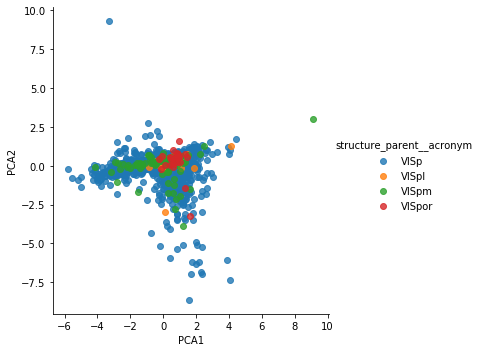

In [27]:
visp_data = visp_features.drop('structure_parent__acronym',axis=1)
visp_data = (visp_data - visp_data.mean())/visp_data.std()
pca = PCA(n_components = 2)           
VISP_2D = pca.fit_transform(visp_data)  
visp_features['PCA1'] = VISP_2D[:, 0]
visp_features['PCA2'] = VISP_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='structure_parent__acronym', data=visp_features, fit_reg=False)
plt.show()

Performing PCA on the VISpm dataframe.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


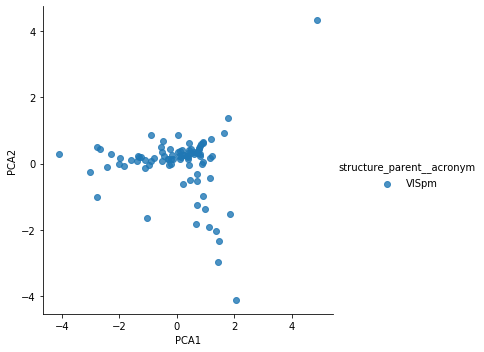

In [28]:
vispm_data = vispm_features.drop('structure_parent__acronym',axis=1)
vispm_data = (vispm_data - vispm_data.mean())/vispm_data.std()
pca = PCA(n_components = 2)           
VISPM_2D = pca.fit_transform(vispm_data)  
vispm_features['PCA1'] = VISPM_2D[:, 0]
vispm_features['PCA2'] = VISPM_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='structure_parent__acronym', data=vispm_features, fit_reg=False)
plt.show()

VIS P TIME HISTOGRAM

In [29]:
presentations = session.get_stimulus_table("flashes")
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords

Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.095 ... 0.495
  * unit_id                          (unit_id) int64 950930145 ... 950933960

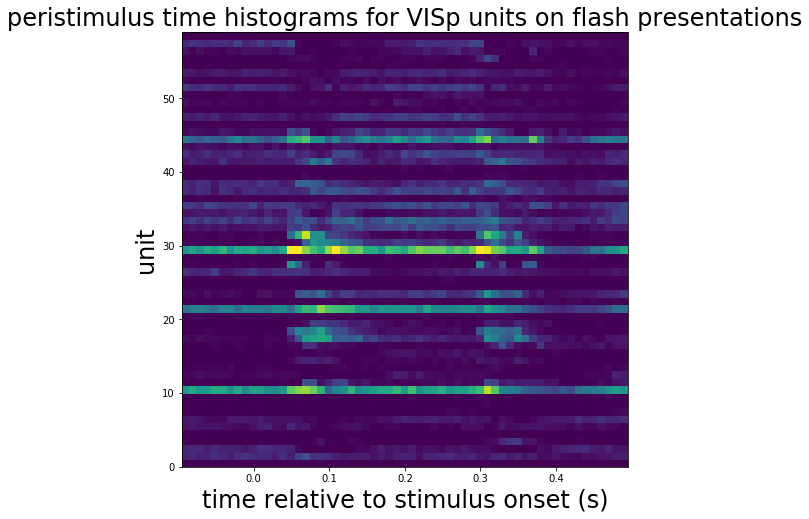

In [30]:
#peristimulus time histograms of VISp
import matplotlib.pyplot as plt
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=24)

plt.show()

VIS PM TIME HISTOGRAM

In [31]:
# the first session in the VISpm list 
session = cache.get_session_data(session_vispm_list[0])

In [32]:
# peristimulus time histograms of VISpm
presentations = session.get_stimulus_table("flashes")
units = session.units[session.units["ecephys_structure_acronym"] == 'VISpm']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords

In [33]:
#peristimulus time histograms of VISpm
import matplotlib.pyplot as plt
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISpm units on flash presentations", fontsize=24)

plt.show()

avg firing rate for visp

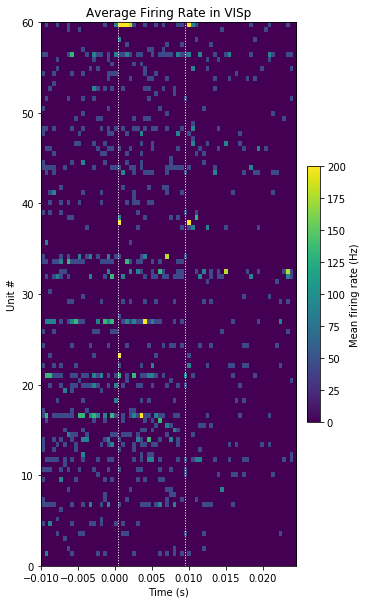

In [34]:
#We used this DataArray to plot the average firing rate for each unit in VISp as a function of time
import matplotlib.pyplot as plt
def plot_optotagging_response(da_visp):

    plt.figure(figsize=(5,10))

    plt.imshow(da_visp.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')
    plt.title('Average Firing Rate in VISp')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da_visp)
plt.show()


avg firing rate for vispm

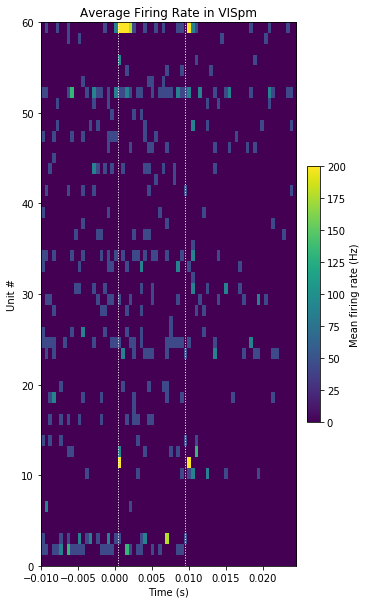

In [35]:
#We used this DataArray to plot the average firing rate for each unit in VISpm as a function of time
import matplotlib.pyplot as plt
def plot_optotagging_response(da_vispm):

    plt.figure(figsize=(5,10))

    plt.imshow(da_vispm.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da_vispm)
plt.title('Average Firing Rate in VISpm')
plt.show()

visp firing rate: excitatory vs inhibitory

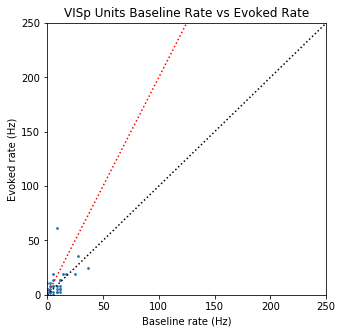

In [36]:
#We compared the baseline and evoked rates and saw a subset of units in VISp with a light-evoked increase in firing rate
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate, evoked_rate, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')
plt.title('VISp Units Baseline Rate vs Evoked Rate')
plt.show()

vispm firing rate: excitatory vs inhibitory

Text(0.5, 1.0, 'VISpm Baseline Rate vs Evoked Rate')

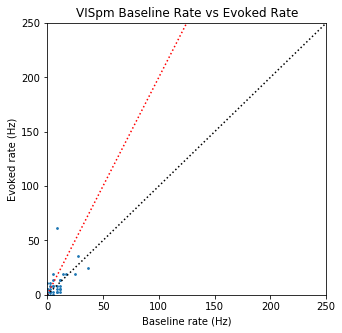

In [37]:
#We compared the baseline and evoked rates and saw a subset of units in VISpm with a light-evoked increase in firing rate
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate, evoked_rate, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')

plt.title('VISpm Baseline Rate vs Evoked Rate')

## Conclusion & Discussion

*Fill in your discussion information here*